<a href="https://colab.research.google.com/github/wordman2/GINN/blob/main/Colab_13_jonas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GINN Teil 13

## Imports

In [ ]:
!pip install bertviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.6/157.6 kB 867.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 5.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-man

## Multiple Choice

Für eine fixierte Input-Tokenlänge und Embedding-Dimensionaliät, welche Aussagen sind wahr bzw. falsch?:



*   Multi-head attention unterstützt besser parallele Berechnung im Vergleich zu single-head attention (True)
*   Multi-head attention führen durch die query, key, und value Darstellungen zu mehr Modellparametern  im Vergleich zu single-head attention  (False, die Anzahl der Parameter wird in der Regel nicht größer, die Parameter wird i.d.R. durch die Anzahl der Heads geteilt)
*   Multi-head attention kann vielfältigere Beziehungen zwischen Token-Embeddings modellieren  im Vergleich zu single-head attention (True)
*   Multi-head attention kann nicht mit scaled dot-product attention verwendet werden, im Vergleich zu single-head attention wo dies möglich ist (False)


## Dimensionalitäten

Sei T die Anzahl der Input Tokens, H die Anzahl der Heads für einen Multi-Head-Attention Layer $d_k$ die Key-Dimensionalität und $d_v$ die Value-Dimensionalität. Jeder Token ist durch einen $d_m$-dimentionalen Embedding-Vektor repräsentiert. Wie ist die Dimensionalität des Tensors, der die lineartransformierten Key für einen Head enthält?

$X$ dimension = $T$ x $d_m$ \
$W_k$ dimension = $d_m$ x $d_k$

$X*W_k$ dimension = $T$ x $d_k$

Wie ist die Dimensionalität der Ausgabe der Multi-Head-Attention VOR der Konkatenierung?

Es wird angenommen, dass es um eine Self-Attention geht:\
T x $d_v$ x H




## QKV Attention berechnen



Gegeben sind die folgenden Matrizen (NACH Anwendung der Transformation der Eingabevektoren):

-  Query-Matrix $Q = \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix}$,
- Key-Matrix $K = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}$,
- Value-Matrix $V = \begin{pmatrix} 2 & 2 \\ 1 & 3 \end{pmatrix}$.

Berechnen Sie das Ergebnis der Self-Attention-Funktion für diese Matrizen.

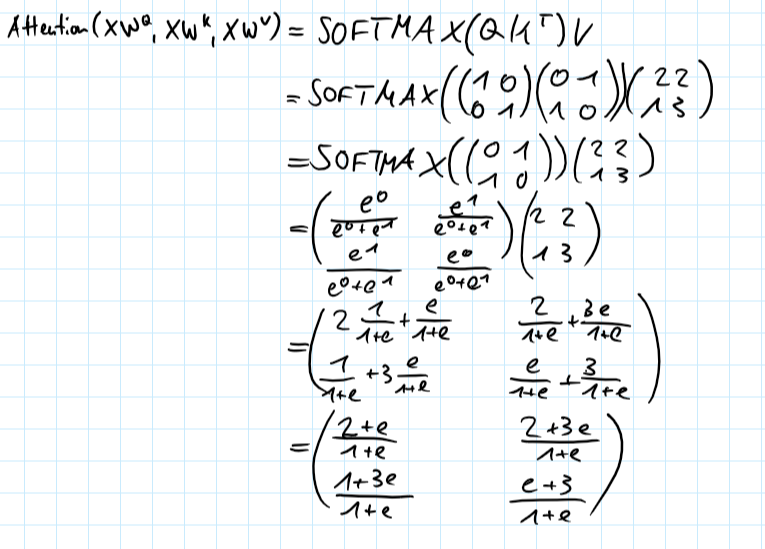

## BertViz Attentions analysieren

Schauen Sie sich https://debug-ml-iclr2019.github.io/cameraready/DebugML-19_paper_2.pdf  und https://towardsdatascience.com/deconstructing-bert-distilling-6-patterns-from-100-million-parameters-b49113672f77 . Welche Bezüge zu den Vorlesungsinhalten sehen Sie?

Verwenden Sie BertViz für das voreingestellte Beispiel. Welche Kandidaten für "Attention Patterns" können Sie finden? Lässt sich Ihrer Vermutung bzgl. des Verhaltens eines Attention Heads auf weitere Beispiele übertragen?



In [ ]:
from transformers import AutoTokenizer, AutoModel, utils
from bertviz import model_view
from bertviz import head_view
utils.logging.set_verbosity_error()  # Remove line to see warnings

# Initialize tokenizer and model. Be sure to set output_attentions=True.
tokenizer = AutoTokenizer.from_pretrained("Helsinki-NLP/opus-mt-en-de")
model = AutoModel.from_pretrained("Helsinki-NLP/opus-mt-en-de", output_attentions=True)

# get encoded input vectors
encoder_input_ids = tokenizer("She sees the small elephant.", return_tensors="pt", add_special_tokens=True).input_ids

# create ids of encoded input vectors
with tokenizer.as_target_tokenizer():
    decoder_input_ids = tokenizer("Den Elefanten sieht sie.", return_tensors="pt", add_special_tokens=True).input_ids

outputs = model(input_ids=encoder_input_ids, decoder_input_ids=decoder_input_ids)

encoder_text = tokenizer.convert_ids_to_tokens(encoder_input_ids[0])
decoder_text = tokenizer.convert_ids_to_tokens(decoder_input_ids[0])

head_view(
    encoder_attention=outputs.encoder_attentions,
    decoder_attention=outputs.decoder_attentions,
    cross_attention=outputs.cross_attentions,
    encoder_tokens= encoder_text,
    decoder_tokens=decoder_text
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.33k [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/768k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/797k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.27M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


pytorch_model.bin:   0%|          | 0.00/298M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:3921: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


<IPython.core.display.Javascript object>

In [ ]:
model_view(
    encoder_attention=outputs.encoder_attentions,
    decoder_attention=outputs.decoder_attentions,
    cross_attention=outputs.cross_attentions,
    encoder_tokens= encoder_text,
    decoder_tokens=decoder_text
)

<IPython.core.display.Javascript object>